In [1]:
# import libraries
import os
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

from src import drop_column_using_vif_, show_vif_values

import imageio
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
# loading the data
Dataframe_2018_normed = pd.read_csv(os.path.join("data","OperatingData","Df_2018_normed.csv"))
Dataframe_2019_normed = pd.read_csv(os.path.join("data","OperatingData","Df_2019_normed.csv"))
Dataframe_2020_normed = pd.read_csv(os.path.join("data","OperatingData","Df_2020_normed.csv"))
Dataframe_2021_normed = pd.read_csv(os.path.join("data","OperatingData","Df_2021_normed.csv"))
Dataframe_2022_normed = pd.read_csv(os.path.join("data","OperatingData","Df_2022_normed.csv"))

In [3]:
# define the dict
dataframes_normed = {'Dataframe_2018_normed': Dataframe_2018_normed,
                     'Dataframe_2019_normed': Dataframe_2019_normed,
                     'Dataframe_2020_normed': Dataframe_2020_normed,
                     'Dataframe_2021_normed': Dataframe_2021_normed,
                     'Dataframe_2022_normed': Dataframe_2022_normed  
}

In [4]:
Merged_dataframe_2018_2022 = pd.read_csv(os.path.join("data","Regression2018_2022","Merged2018_2022.csv"))

In [5]:
# Create a yeas' list
years = ['2018', '2019', '2020', '2021', '2022']

**Operate the Multiple Regression Model**

In [6]:
# collecting model's stats for Meta Regression
model_stats = pd.DataFrame()

                            OLS Regression Results                            
Dep. Variable:         PriceDiff_2018   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     3.623
Date:                Tue, 16 Jan 2024   Prob (F-statistic):            0.00835
Time:                        00:59:21   Log-Likelihood:                -34.357
No. Observations:                  32   AIC:                             84.71
Df Residuals:                      24   BIC:                             96.44
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0029    

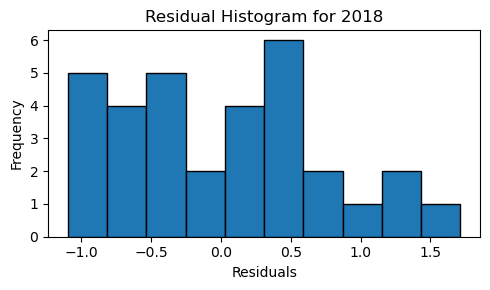

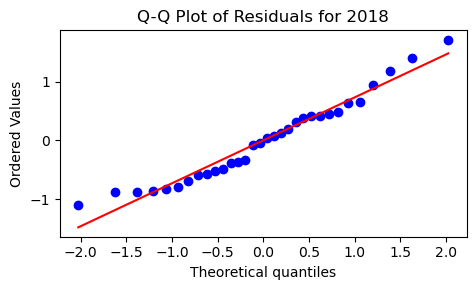

                            OLS Regression Results                            
Dep. Variable:         PriceDiff_2019   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     1.379
Date:                Tue, 16 Jan 2024   Prob (F-statistic):              0.259
Time:                        00:59:22   Log-Likelihood:                -40.487
No. Observations:                  32   AIC:                             96.97
Df Residuals:                      24   BIC:                             108.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0013    

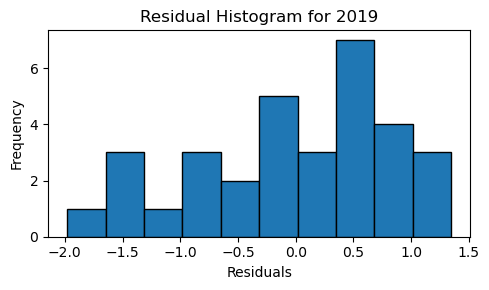

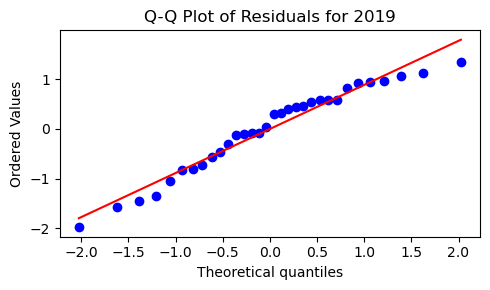

                            OLS Regression Results                            
Dep. Variable:         PriceDiff_2020   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     1.405
Date:                Tue, 16 Jan 2024   Prob (F-statistic):              0.249
Time:                        00:59:22   Log-Likelihood:                -40.391
No. Observations:                  32   AIC:                             96.78
Df Residuals:                      24   BIC:                             108.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0050    

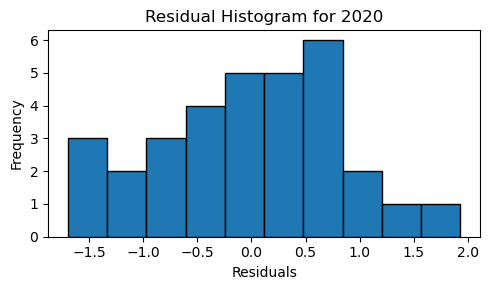

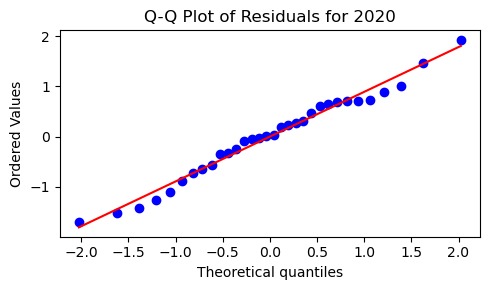

                            OLS Regression Results                            
Dep. Variable:         PriceDiff_2021   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     11.27
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           2.97e-06
Time:                        00:59:22   Log-Likelihood:                -22.605
No. Observations:                  32   AIC:                             61.21
Df Residuals:                      24   BIC:                             72.94
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0002    

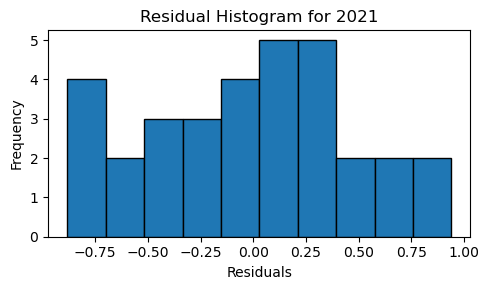

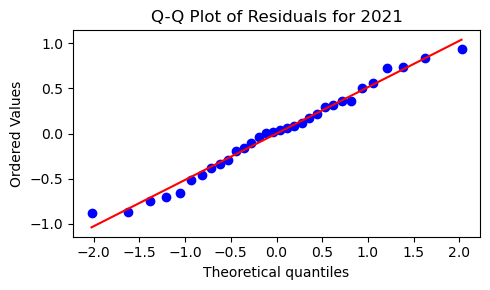

                            OLS Regression Results                            
Dep. Variable:         PriceDiff_2022   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     7.864
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           5.68e-05
Time:                        00:59:23   Log-Likelihood:                -26.822
No. Observations:                  32   AIC:                             69.64
Df Residuals:                      24   BIC:                             81.37
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0027    

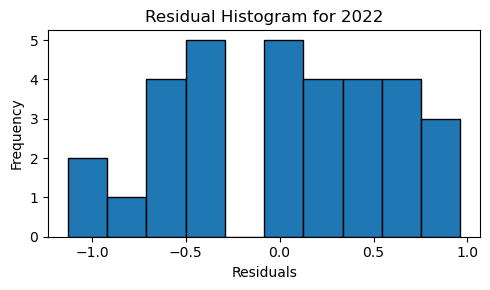

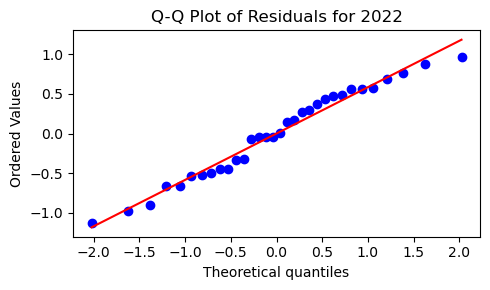

In [7]:

for temp_year in years:


    Names_X_indep = [f'Finance_Secure_{temp_year}', f'Environment_{temp_year}', f'Employment_{temp_year}', 
            f'Healthy_{temp_year}', f'Safety_{temp_year}', f'Decent_Home_{temp_year}', f'Connections_{temp_year}']
    
    X_indep = dataframes_normed[f'Dataframe_{temp_year}_normed'][Names_X_indep]  # 自变量
    y_dep = dataframes_normed[f'Dataframe_{temp_year}_normed'][f'PriceDiff_{temp_year}']                # 因变量
    
    # add constatnt
    X = sm.add_constant(X_indep)

    # build the model
    model = sm.OLS(y_dep, X).fit()

    # check the result
    print(model.summary())

    # calculate the residuals
    residuals = model.resid

    # plot residuals' histogram
    plt.figure(figsize=(5, 3))
    plt.hist(residuals, bins=10, edgecolor='black')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title(f'Residual Histogram for {temp_year}')

    plt.tight_layout()

    plt.savefig(os.path.join("images", "ResidualsAnalysis", f'residual_histogram_{temp_year}.png'), bbox_inches='tight')
    plt.show()

    # Q-Q plot of residuals
    plt.figure(figsize=(5, 3))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of Residuals for {temp_year}')
    
    plt.tight_layout()

    plt.savefig(os.path.join("images", "ResidualsAnalysis", f'residual_qqplot_{temp_year}.png'),bbox_inches='tight')
    plt.show()



    # extract model's summary and metrics
    results_df = pd.DataFrame({'coefficients': model.params, 'p-values': model.pvalues})

    # 保存到CSV
    results_df.to_csv(os.path.join("AnalysisResult", "ModelResults", f'model_results_{temp_year}.csv'))


    # 创建临时DataFrame来存储当前年份的模型统计数据
    temp_stats = pd.DataFrame({
        'Year': temp_year,
        'Parameter': model.params.index,
        'Coefficient': model.params.values,
        'StdErr': model.bse.values,
        'PValue': model.pvalues.values
    })

    # 将临时DataFrame添加到model_stats
    model_stats = pd.concat([model_stats, temp_stats], ignore_index=True)

model_stats.to_csv(os.path.join("AnalysisResult","ModelResults","MetaRegression_data.csv"))

                            OLS Regression Results                            
Dep. Variable:              PriceDiff   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     3.552
Date:                Tue, 16 Jan 2024   Prob (F-statistic):            0.00145
Time:                        00:59:23   Log-Likelihood:                -217.35
No. Observations:                 160   AIC:                             450.7
Df Residuals:                     152   BIC:                             475.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0012      0.076     -0.

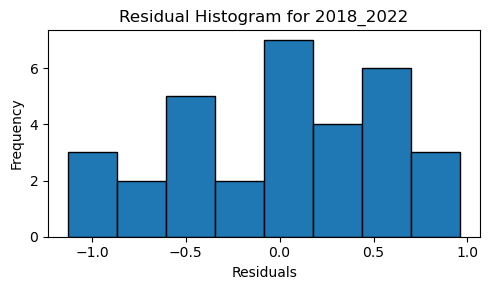

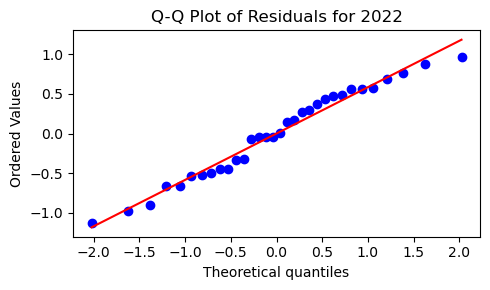

In [8]:

X_vars = ['Finance_Secure', 'Environment', 'Employment', 
            'Healthy', 'Safety', 'Decent_Home', 'Connections']
    
X_indep = Merged_dataframe_2018_2022[X_vars]    # 自变量
y_dep = Merged_dataframe_2018_2022['PriceDiff']       # 因变量
    
# 添加常数项
X_merge = sm.add_constant(X_indep)

# 构建模型
model = sm.OLS(y_dep, X_merge).fit()

# 查看模型结果
print(model.summary())

# 绘制残差的直方图
plt.figure(figsize=(5, 3))
plt.hist(residuals, bins=8, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title(f'Residual Histogram for 2018_2022')

plt.tight_layout()

plt.savefig(os.path.join("images", "ResidualsAnalysis", f'residual_histogram_2018_2022.png'), bbox_inches='tight')
plt.show()

# 绘制残差的Q-Q图
plt.figure(figsize=(5, 3))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title(f'Q-Q Plot of Residuals for {temp_year}')
    
plt.tight_layout()

plt.savefig(os.path.join("images", "ResidualsAnalysis", f'residual_qqplot_2018_2022.png'),bbox_inches='tight')
plt.show()

# 提取模型的系数和统计数据
results_df = pd.DataFrame({'coefficients': model.params, 'p-values': model.pvalues})

# 保存到CSV
results_df.to_csv(os.path.join("AnalysisResult", "ModelResults", "model_results_18_22.csv"))


In [23]:
Coefficients_variables = pd.read_csv(os.path.join("AnalysisResult","CoefficientsVariables18_22.csv"),index_col='Coef')

Coefficients_variables_transposed = Coefficients_variables.transpose()


#Coefficients_variables_transposed.columns = Coefficients_variables_transposed.iloc[0]
#Coefficients_variables_transposed = Coefficients_variables_transposed[1:]
#Coefficients_variables_transposed = Coefficients_variables_transposed.set_index('Unnamed: 0')
Coefficients_variables_transposed.columns


Index(['Coef-FinanceSecure', 'Coef-Environment', 'Coef-Employment',
       'Coef-Healthy', 'Coef-Safety', 'Coef-Decent_Home',
       'Coef-Connections       '],
      dtype='object', name='Coef')

In [26]:
print(len(Coefficients_variables_transposed.index))
print(len(subject1_data))
print(len(subject2_data))

7
5
5


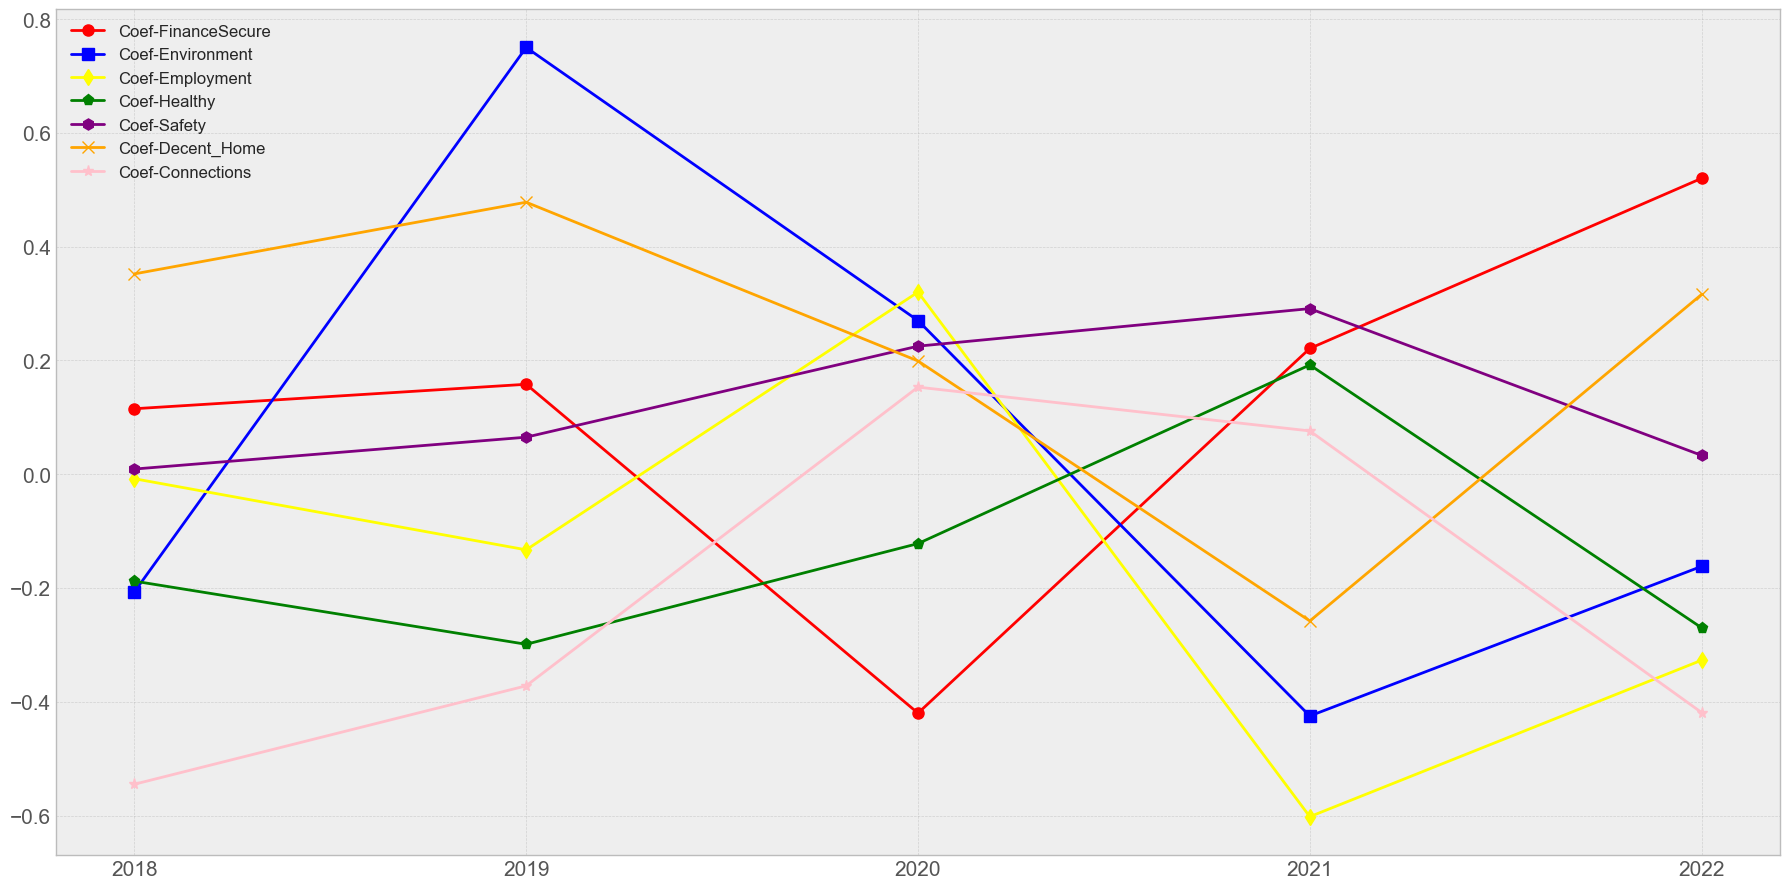

In [59]:


plt.style.use('bmh')
# 创建一个图表对象
plt.figure(figsize=(18,9), facecolor='white')

# 从CSV数据中选择要绘制的列，例如，假设CSV文件有多列数据，每列代表一个主体的数据
# 假设CSV文件中有三列数据分别代表三个主体，你可以根据你的需求调整列名
subject1_data = Coefficients_variables_transposed['Coef-FinanceSecure']
subject2_data = Coefficients_variables_transposed['Coef-Environment']
subject3_data = Coefficients_variables_transposed['Coef-Employment']
subject4_data = Coefficients_variables_transposed['Coef-Healthy']
subject5_data = Coefficients_variables_transposed['Coef-Safety']
subject6_data = Coefficients_variables_transposed['Coef-Decent_Home']
subject7_data = Coefficients_variables_transposed['Coef-Connections       ']

# 添加折线图
plt.plot(Coefficients_variables_transposed.index, subject1_data, label='Coef-FinanceSecure', color='red', marker='o', markersize=8)
plt.plot(Coefficients_variables_transposed.index, subject2_data, label='Coef-Environment', color='blue',marker='s', markersize=8)
plt.plot(Coefficients_variables_transposed.index, subject3_data, label='Coef-Employment', color='yellow',marker='d', markersize=8)
plt.plot(Coefficients_variables_transposed.index, subject4_data, label='Coef-Healthy', color='green',marker='p', markersize=8)
plt.plot(Coefficients_variables_transposed.index, subject5_data, label='Coef-Safety', color='purple',marker='h', markersize=8)
plt.plot(Coefficients_variables_transposed.index, subject6_data, label='Coef-Decent_Home', color='orange',marker='x', markersize=8)
plt.plot(Coefficients_variables_transposed.index, subject7_data, label='Coef-Connections', color='pink',marker='*', markersize=8)

plt.grid(True, linestyle='--', alpha=0.5)
# 设置图表标题和标签
plt.xticks(size=15)
plt.yticks(size=15)


# 添加图例
plt.legend(fontsize=12)

plt.tight_layout()
plt.savefig(os.path.join("images","VariableCoefficients.png"),bbox_inches='tight')
# 显示图表
plt.show()
